Dataset : https://www.kaggle.com/knightbearr/analysis-sales-data-knightbearr/data

### Context:
    Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

### Data Features:
    
- **Order ID** - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
- **Product** - The product that have been sold.
- **Quantity Ordered** - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
- **Price Each** - The price of each products.
- **Order Date** - This is the date the customer is requesting the order be shipped.
- **Purchase Address** - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

### Goal

- The market analysis is an assessment of how your product or service fits into a specific market and where it will gain the most.

### Research Questions:
    
<br>Q: What was the best Year for sales? 
<br>Q: How much was earned that Year?
<br>Q: What was the best month for sales? 
<br>Q: How much was earned that month?
<br>Q: What City had the highest number of sales?
<br>Q: What time should we display adverstisement to maximize likelihood of customer's buying product?
<br>Q: What products are most often sold together?
<br>Q: What product sold the most? 
<br>Q: Why do you think it sold the most?

### How Much Probability?

<br>How much probability for next people will ordered USB-C Charging Cable?
<br>How much probability for next people will ordered iPhone?
<br>How much probability for next people will ordered Google Phone?
<br>How much probability other peoples will ordered Wired Headphones?

## Import Necessary Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
import seaborn as sns
import warnings
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

In [58]:
import os
!pwd

C:\Users\Ahmad Abd Elhameed\sales_data_analysis


In [59]:
import zipfile
with zipfile.ZipFile("results.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [60]:
os.listdir()

['.ipynb_checkpoints', 'data', 'results.zip', 'Sales Data Deep Analysis.ipynb']

In [61]:
os.listdir("data")

['all_data.csv', '__results___files']

In [62]:
data = pd.read_csv("data/all_data.csv")

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [64]:
## look at the data
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [65]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [66]:
## check the categorical variables
cat_vars = data.select_dtypes("object")

In [67]:
for col in cat_vars:
    print('{} : {} unique values'.format(col,data[col].nunique()))

Order ID : 178438 unique values
Product : 20 unique values
Quantity Ordered : 10 unique values
Price Each : 24 unique values
Order Date : 142396 unique values
Purchase Address : 140788 unique values


In [68]:
## Check missing values in each vcolumn
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [69]:
data.isnull().sum()[0]/data.shape[0] * 100 

0.29167781643029167

In [70]:
## we have 545 missing values in each column and the missing values are about 0.3 % , its too small 

In [71]:
## let's just drop the missing value, I think this will not affect the data since the data is big enough.

In [72]:
data = data.dropna(how='all')

In [73]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [74]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [82]:
## Convert Quantity Ordered ,Order ID and Price Each columns to numeric values

In [44]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [75]:
data['Quantity Ordered'].unique()

array(['2', '1', '3', '4', 'Quantity Ordered', '6', '7', '5', '8', '9'],
      dtype=object)

In [78]:
data['Quantity Ordered'].mode()

0    1
dtype: object

In [76]:
data['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

In [80]:
data['Quantity Ordered'].replace("Quantity Ordered",1,inplace=True)

In [81]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype("int")

In [83]:
data['Price Each'].unique()

array(['11.99', '99.99', '700.0', '3.84', '379.99', '109.99', '1700.0',
       '600.0', '149.99', '14.95', '150.0', '2.99', '11.95', '389.99',
       '999.99', '300.0', '400.0', 'Price Each', '600', '150', '1700',
       '300', '400', '700'], dtype=object)

In [84]:
data['Price Each'].value_counts()

11.95         21903
14.95         21658
2.99          20641
3.84          20577
11.99         18882
150           15450
99.99         13325
149.99         7507
700            6804
389.99         6230
379.99         6181
600            5490
300            4780
1700           4702
999.99         4128
109.99         4101
400            2056
600.0          1347
Price Each      355
150.0            99
700.0            38
1700.0           22
300.0            20
400.0             9
Name: Price Each, dtype: int64

In [ ]:
## We have 355 rows with no info , so we will delete them

In [86]:
data[data['Price Each'] != "Price Each"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [87]:
data = data[data['Price Each'] != "Price Each"]

**At first, when we load the data ,we had a 186850 rows ,then we discovred 545 missing values and 355 non info rows**

In [ ]:
## total rows dropped = 900 rows

In [88]:
data.shape

(185950, 6)

In [92]:
data['Order ID'] = data['Order ID'].astype("int")

In [93]:
data['Price Each'] = data['Price Each'].astype("float")

In [94]:
data.dtypes

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [95]:
## And let's convert Order Date column too, so we can take the Year, Month

In [96]:
data['Order Date']

0         08/31/19 22:21
1         08/15/19 15:11
2         08/06/19 14:40
3         08/29/19 20:59
4         08/15/19 19:53
               ...      
186845    12/11/19 20:58
186846    12/01/19 12:01
186847    12/09/19 06:43
186848    12/03/19 10:39
186849    12/21/19 21:45
Name: Order Date, Length: 185950, dtype: object

In [97]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [99]:
data['Order Date'].head(3)

0   2019-08-31 22:21:00
1   2019-08-15 15:11:00
2   2019-08-06 14:40:00
Name: Order Date, dtype: datetime64[ns]

In [105]:
data['Purchase Address'].nunique()

140787

### Recap Data
**This is some point that we have.**

<br>We have total  186850  records and  6  columns cateogircal type
<br>The total of missing value that we have is  545 and 0.29167 % of data ,and 355 without info 
<br>**Order ID** :  178437  unique value(s)
<br>**Product** :  19  unique value(s)
<br>**Quantity Ordered** :  9  unique value(s)
<br>**Price Each** :  17  unique value(s)
<br>**Order Date** :  142395  unique value(s)
<br>**Purchase Address** :  140787  unique value(s)

## Data Preparation
Data preparation is the act of manipulating raw data into a form that can readily and accurately be analysed, e.g. for business purposes. Data Preparation is a pre-processing step in which data from one or more sources is cleaned and transformed to improve its quality prior to its use in business analytics.

In [107]:
def adding_new_features(data):
    
    def get_city(address):
        return address.split(',')[1]
    def get_state(address):
        return address.split(',')[2].split(" ")[1]
    
    data['year'] = data['Order Date'].dt.year
        
    data['month'] = data['Order Date'].dt.month
    
    data['day'] = data['Order Date'].dt.day
    
    data['hour'] = data['Order Date'].dt.hour
    
    data['minute'] = data['Order Date'].dt.minute
    
    data['total_purchase'] = data['Quantity Ordered'] * data['Price Each']
    
    data['city'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})")
    
    return data

In [108]:
df = adding_new_features(data)

In [109]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,hour,minute,total_purchase,city
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,31,22,21,23.98,Seattle(WA)
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,15,11,99.99,Dallas(TX)
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,6,14,40,700.00,Portland(OR)
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,29,20,59,7.68,Los Angeles(CA)
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,15,19,53,7.68,New York City(NY)


In [110]:
df.year.unique()

array([2019, 2020], dtype=int64)

## Data Analysis

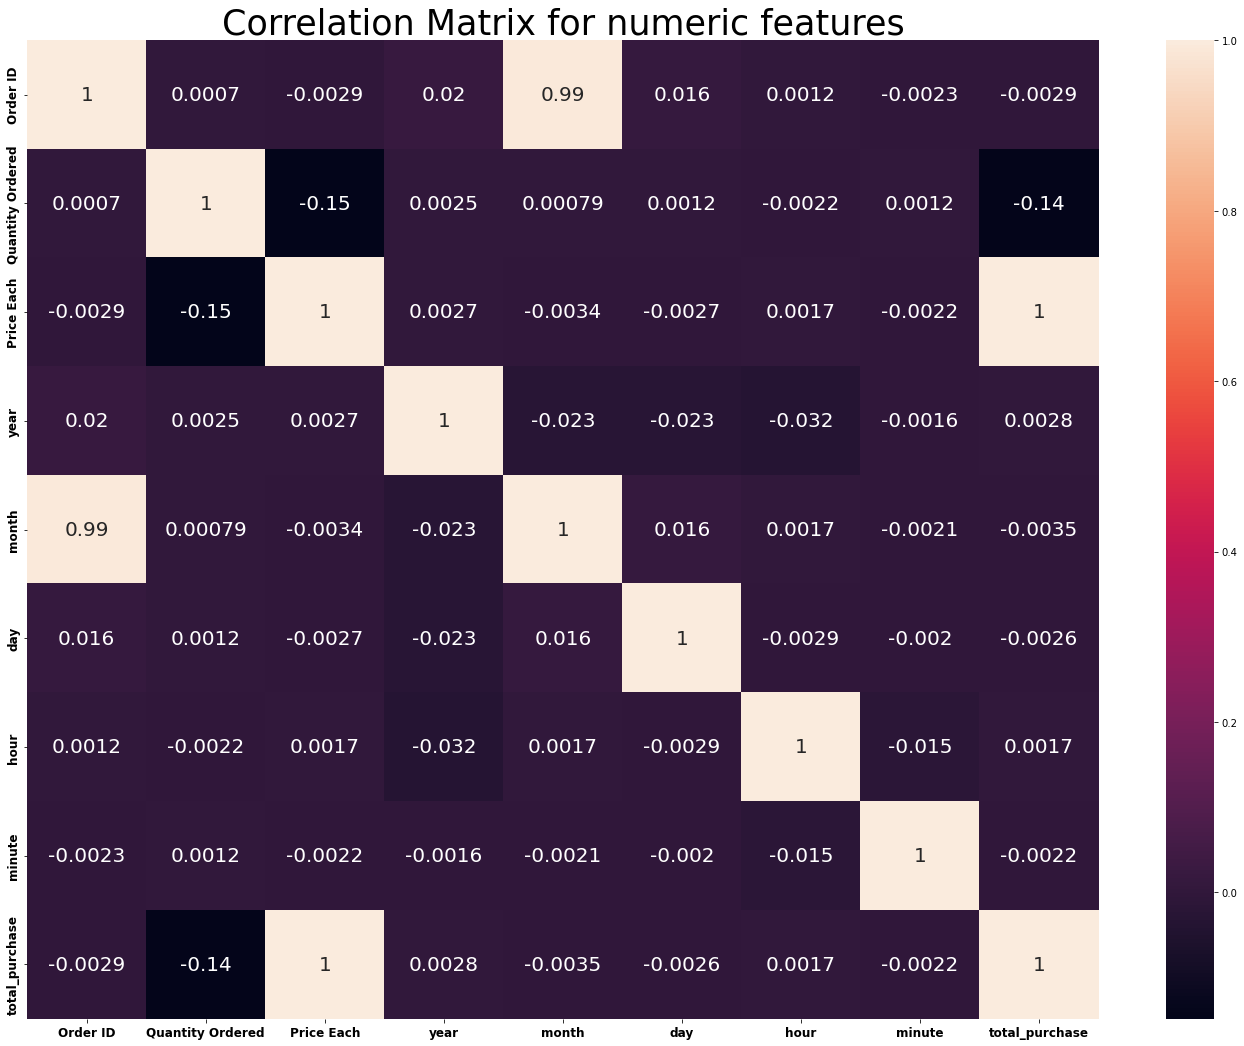

In [119]:
cm = df.corr(method = "pearson")
plt.figure(figsize=(24, 18))
sns.heatmap(cm,annot=True,annot_kws={"fontsize":20})
plt.title("Correlation Matrix for numeric features",fontsize=35)
plt.xticks(weight="bold", fontsize=12) # x-ticks
plt.yticks(weight="bold", fontsize=12); # y-ticks
plt.show()

In [122]:
## check correlation with total_purchase
df.corr()['total_purchase'].sort_values(ascending=False)

total_purchase      1.000000
Price Each          0.999203
year                0.002824
hour                0.001668
minute             -0.002162
day                -0.002580
Order ID           -0.002949
month              -0.003466
Quantity Ordered   -0.139417
Name: total_purchase, dtype: float64

In [123]:
df_numeric = df.describe(include=[np.number])

In [124]:
df_numeric

,Order ID,Quantity Ordered,Price Each,year,month,day,hour,minute,total_purchase
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,2019.000183,7.059140,15.759532,14.413305,29.481361,185.490917
std,51512.737110,0.442793,332.731330,0.013521,3.502996,8.782176,5.423416,17.317573,332.919771
min,141234.000000,1.000000,2.990000,2019.000000,1.000000,1.000000,0.000000,0.000000,2.990000
25%,185831.250000,1.000000,11.950000,2019.000000,4.000000,8.000000,11.000000,14.000000,11.950000
50%,230367.500000,1.000000,14.950000,2019.000000,7.000000,16.000000,15.000000,29.000000,14.950000
75%,275035.750000,1.000000,150.000000,2019.000000,10.000000,23.000000,19.000000,45.000000,150.000000
max,319670.000000,9.000000,1700.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,3400.000000


## Univariate Analysis

The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

In [125]:
def univariate_analysis(data, color, title1, title2):
    
    """
    Showing visualization of univariate analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig :Figure object with the plot drawn onto it.
    """
    
    
    fig, (ax1, ax2) = plt.subplots( # subplots
    ncols=2, # num of cols
    nrows=1, # num of rows
    figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set_title( # set the title 1
        title1, 
        weight="bold", # weight
        fontsize=25, # font-size
        pad=30 # padding
    ) 
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set_title( # set the title 2
        title2, 
        weight="bold", # weight
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    return fig # returning the figure

#### Chebyshev’s Theorem
Chebyshev’s Theorem estimates the minimum proportion of observations that fall within a specified number of standard deviations from the mean. This theorem applies to a broad range of probability distributions. Chebyshev’s Theorem is also known as Chebyshev’s Inequality.

#### Quantile plot
The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.

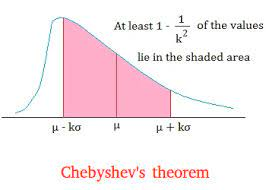

In [129]:
from IPython.display import Image
Image(filename='th.jpg',width = 500) 

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


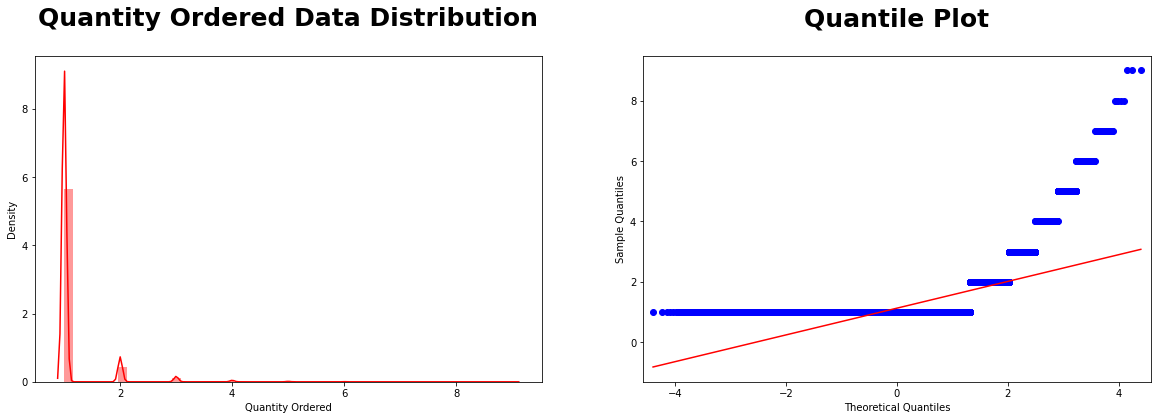

In [130]:
# Quantity Ordered Data
univariate_analysis( 
    data=df['Quantity Ordered'], # data
    color='red', # pick the color
    title1='Quantity Ordered Data Distribution', # title1
    title2='Quantile Plot' # title2
);

In [131]:
## its usually the customer buy 1 item , and a few buy 2 or more

Find the proportion that lies in between two standard deviation ( σ ) from mean ( μ ), and let's try to interprete that.
from table above σ = 0.44 and  μ = 1.12